In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

## Import data

In [69]:
train_data = pd.read_csv('data/optdigits.tra', header=None)
test_data = pd.read_csv('data/optdigits.tes', header=None)

## Display data
We visualize some of the data for verification purposes.

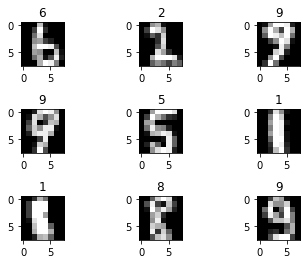

In [41]:
selection = train_data.sample(9).values
sel_x = np.reshape(selection[:, :-1], (-1, 8, 8))

fig, ax = plt.subplots(3, 3)
plt.subplots_adjust(hspace=1)

for i, axis in enumerate(ax.flatten()):
    axis.imshow(sel_x[i], cmap='gray', vmin=0, vmax=16)
    axis.set_title(selection[i, -1])

plt.show()


## Feature selection
We preprocess the features and labels. Labels are one-hot encoded. Pixel values are scaled to floats in [0, 1].

In [48]:
labels = pd.get_dummies(train_data.iloc[:, -1]).values
features = train_data.iloc[:, :-1].values / 16

array([[0.    , 0.0625, 0.375 , ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.1875, ..., 0.5625, 0.    , 0.    ],
       [0.    , 0.    , 0.375 , ..., 1.    , 0.3125, 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.    , 0.    , 0.    ]])

In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, labels)

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, verbose=True)

In [82]:
model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=True,
                       warm_start=False)

In [83]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

acc_train = np.sum(np.argmax(pred_train, axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0]
acc_test = np.sum(np.argmax(pred_test, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]

print(f'Train set accuracy: {acc_train:.2%}')
print(f'Validation set accuracy: {acc_test:.2%}')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Train set accuracy: 100.00%
Validation set accuracy: 92.26%


Test accuracy against the test dataset containing numbers from other writers:

In [84]:
pred = np.argmax(model.predict(test_data.iloc[:, :-1].values / 16), axis=1)

acc = np.sum(pred == test_data.iloc[:, -1]) / test_data.shape[0]

print(f'Test set accuracy: {acc:.2%}')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Test set accuracy: 87.92%
